<a href="https://colab.research.google.com/github/junsookim76/Ewha_2023/blob/main/4_rdkit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install mordred seaborn

In [ ]:
from mordred import Calculator, descriptors
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
IPythonConsole.ipython_useSVG=True

In [ ]:
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

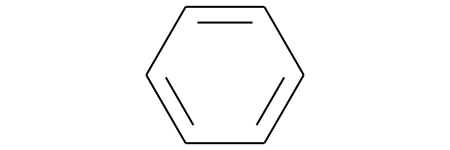

In [ ]:
mol=Chem.MolFromSmiles("c1ccccc1")
mol

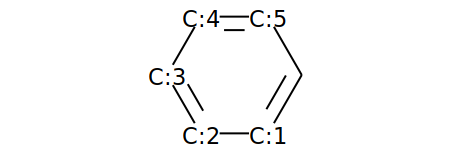

In [ ]:
# With atom index
mol_with_atom_index(mol)

In [ ]:
mols=[]
with open("/storage/cbpc/chembl_mini.smi") as f:
    for line in f.readlines():
        data=line.split()
        mol=Chem.MolFromSmiles(data[0])
        mol.SetProp("chembl_id",data[1])
        mol.SetProp("smiles",data[0])
        mols.append(mol)

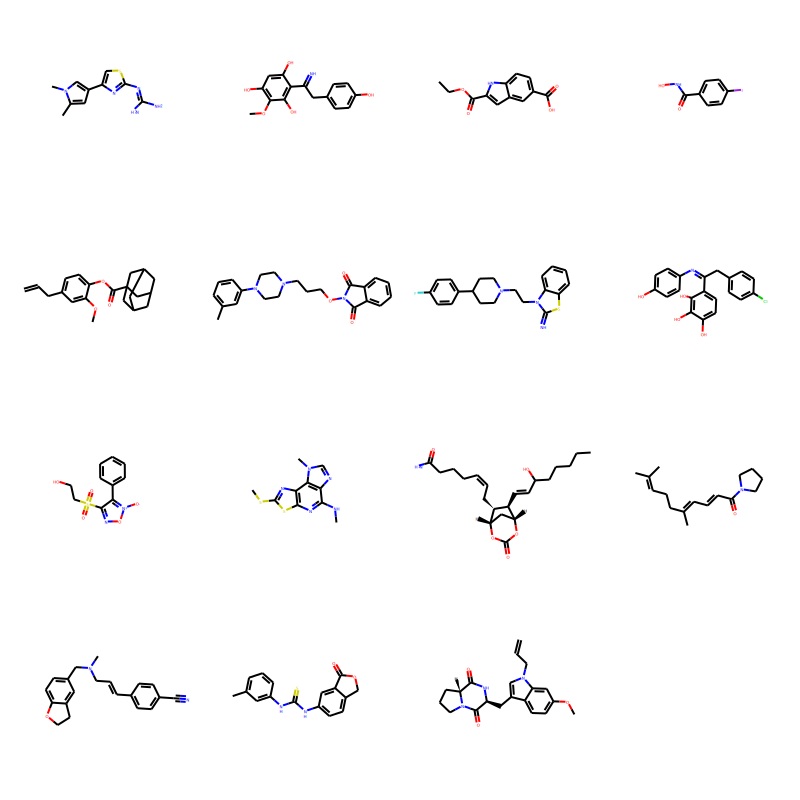

In [ ]:
Draw.MolsToGridImage(mols[:15],molsPerRow=4)

In [ ]:
calc=Calculator(descriptors.ABCIndex)

In [ ]:
calc.register(descriptors.AcidBase)
calc.register(descriptors.Aromatic)
#calc.register(descriptors.AtomCount)
calc.register(descriptors.BondCount)
calc.register(descriptors.BalabanJ)
calc.register(descriptors.HydrogenBond)
calc.register(descriptors.Polarizability)
calc.register(descriptors.WalkCount)
calc.register(descriptors.Weight)
calc.register(descriptors.TopologicalCharge)
mordred=calc.pandas(mols)

100%|██████████| 5000/5000 [00:16<00:00, 298.86it/s]


In [ ]:
mordred

,ABC,ABCGG,nAcid,nBase,nAromAtom,nAromBond,nBonds,nBondsO,nBondsS,nBondsD,...,JGI2,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,JGT10
0,12.377494,11.320978,0,3,10,10,30,17,19,1,...,0.074074,0.066520,0.048235,0.025481,0.032993,0.012915,0.026878,0.000000,0.000000,0.551803
1,15.901098,13.784340,0,0,12,12,37,22,24,1,...,0.093190,0.068015,0.048315,0.037879,0.018442,0.014853,0.016683,0.008563,0.017524,0.550736
2,12.934771,11.320765,1,0,9,10,29,18,17,2,...,0.088889,0.051215,0.050917,0.030174,0.027647,0.020727,0.011519,0.013333,0.000000,0.516643
3,7.956514,7.521784,0,0,6,6,17,11,10,1,...,0.111111,0.038462,0.047778,0.052778,0.026939,0.000000,0.000000,0.000000,0.000000,0.504340
4,19.099223,14.826865,0,0,6,6,53,27,45,2,...,0.061111,0.046875,0.045657,0.031713,0.011398,0.015224,0.011074,0.009777,0.006870,0.498958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,14.170645,11.348074,0,0,11,11,32,20,19,2,...,0.082305,0.021991,0.022722,0.029965,0.028976,0.007653,0.005393,0.008662,0.009437,0.367104
4996,16.484101,15.059143,0,0,11,11,45,22,34,0,...,0.101587,0.071128,0.049706,0.055556,0.016296,0.031308,0.000000,0.000000,0.000000,0.689217
4997,19.396191,15.700007,0,0,18,18,47,27,28,1,...,0.087719,0.051829,0.042339,0.034127,0.019784,0.013125,0.013192,0.008047,0.006806,0.462153
4998,20.034348,15.784135,0,0,18,18,45,28,25,1,...,0.085470,0.041667,0.045497,0.035119,0.019712,0.014509,0.014823,0.006424,0.005669,0.465318


/opt/anaconda3/envs/md/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


<AxesSubplot:>

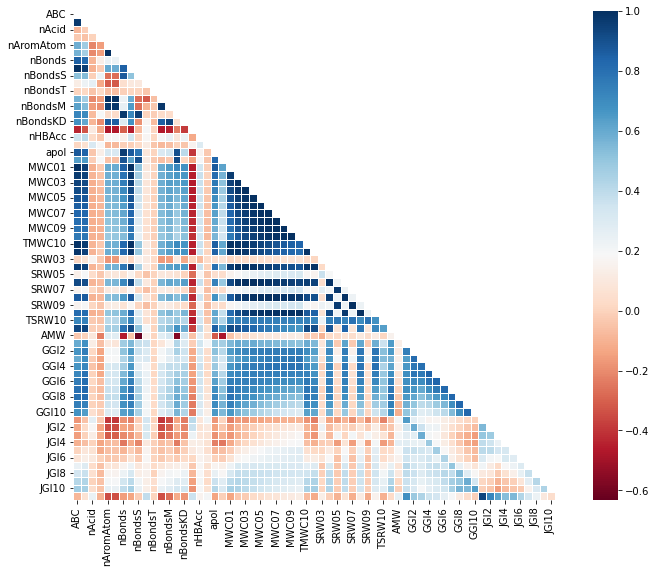

In [ ]:
correlation=mordred.corr()
mask=np.triu(np.ones_like(correlation, dtype=np.bool))
f,ax=plt.subplots(figsize=(11, 9))
sns.heatmap(
    correlation,
    mask=mask,
    cmap="RdBu",
    square=True,
    linewidths=0.5,
)

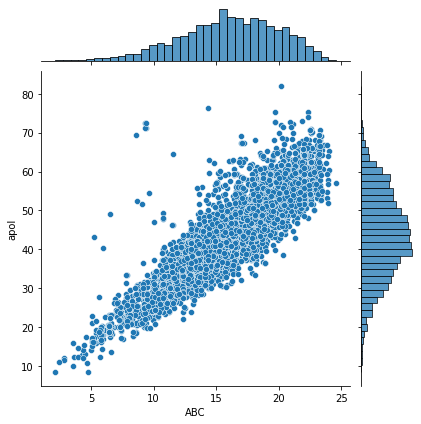

In [ ]:
sns.jointplot(x='ABC',y='apol',data=mordred)

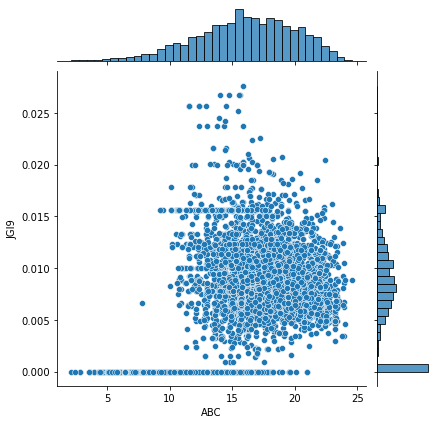

In [ ]:
sns.jointplot(x='ABC',y='JGI9',data=mordred)

In [ ]:
MLR=make_pipeline(QuantileTransformer(),
                MLPRegressor(hidden_layer_sizes=(100, 50, 100),
                             learning_rate_init=0.01,
                             max_iter=500,
                             early_stopping=True))

In [ ]:
X=mordred.drop(columns=['MW','AMW'])
y=mordred['MW']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7)

In [ ]:
MLR.fit(X_train, y_train)

Pipeline(steps=[('quantiletransformer', QuantileTransformer()),
                ('mlpregressor',
                 MLPRegressor(early_stopping=True,
                              hidden_layer_sizes=(100, 50, 100),
                              learning_rate_init=0.01, max_iter=500))])

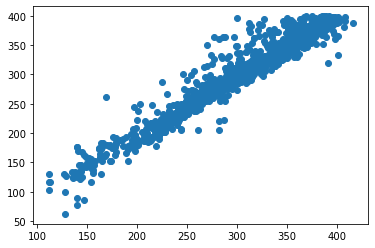

In [ ]:
plt.plot(MLR.predict(X_test),y_test,"o")

In [ ]:
testsets='''Cc1cccc(/N=N/c2ccc(C(=O)O)cc2)c1	CHEMBL12916
CC1(C)Cc2cc(Cl)cc(Cl)c2C=[N+]1[O-]	CHEMBL12917
O=C(O)CCCCCC(=O)N1CCC2(CCN(c3ccncc3)CC2)C1	CHEMBL13002
CC(C)c1ccc2c(c1)CC[C@H]1[C@@H](CO)[C@@H](O)CC[C@]21C	CHEMBL12668
CC(C)c1ccccc1Sc1c(O)cc(-c2ccc([N+](=O)[O-])cc2)oc1=O	CHEMBL12671
CCCC/C=C(/c1ccc(O)cc1)c1ccc(OCCN(CC)CC)cc1	CHEMBL12959
CC(C)(C)c1ccc(C2OC2c2ccc(C(=O)O)cc2)cc1	CHEMBL12961
O=[N+]([O-])c1ccc(S(=O)(=O)CS(=O)(=O)C(F)(F)F)cc1	CHEMBL12894
CC(C)N(CCC(CCN1CCCCCC1)(C(N)=O)c1ccccc1)C(C)C	CHEMBL12982
Cn1cc(C(=O)c2ccccc2)cc1C=C(C(=O)NO)C(=O)NO	CHEMBL12983
COC(=O)c1ccccc1OCC(O)CNC(C)(C)CNC(N)=O	CHEMBL12984
Cn1cc(C(=O)c2ccccc2)cc1CC(=O)NO	CHEMBL12986
CN1CCN(c2cc3c(cc2F)c(=O)c(C(=O)O)cn3N(C)C)CC1	CHEMBL13004
CC1CCC(NC(=O)N(CCF)N=O)CC1	CHEMBL13005
CNn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCOCC3)cc21	CHEMBL13006
CC(C)(C)c1cc(/C=C/c2nnc(O)o2)cc(C(C)(C)C)c1O	CHEMBL12395
c1ccc2c3c([nH]c2c1)CN(CCc1cnccn1)CC3	CHEMBL12396
'''

In [ ]:
testmols=[]
for i in testsets.split():
    if "CHEMBL" not in i:
        mol=Chem.MolFromSmiles(i)
        if mol is not None:
            testmols.append(mol)

In [ ]:
testmol_param=calc.pandas(testmols)

100%|██████████| 17/17 [00:00<00:00, 197.79it/s]


In [ ]:
testX=testmol_param.drop(columns=['MW','AMW'])

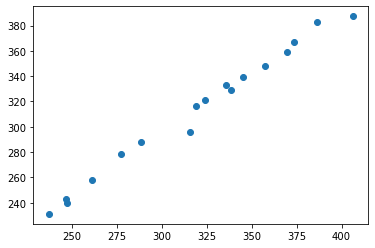

In [ ]:
plt.plot(MLR.predict(testX),testmol_param['MW'],"o")